In [1]:
# https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn.metrics as metrics
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import RidgeClassifier
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from xgboost.sklearn import XGBRegressor
from numpy import asarray
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot
from sklearn.linear_model import SGDClassifier
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import ElasticNet

In [2]:
def regressionMetrics(y, yhat):
    res = {'MSE': metrics.mean_squared_error(y,yhat),
           'RMSE': np.sqrt(metrics.mean_squared_error(y,yhat)),
           'MAE': metrics.mean_absolute_error(y,yhat),
           'MSLE': metrics.mean_squared_log_error(y,yhat),
           'RMSLE': np.sqrt(metrics.mean_squared_log_error(y,yhat))
          }
    return res

In [3]:
## example = test the model
y = [2,4,6,8,10]
y_hat = [2,3,4,5,30]

In [4]:
regressionMetrics(y, y_hat)

{'MSE': 82.8,
 'RMSE': 9.09945053286186,
 'MAE': 5.2,
 'MSLE': 0.28017901106191967,
 'RMSLE': 0.5293193847403661}

In [5]:
df = pd.read_csv('../input/test-dev-train/dev_data.csv')
df.describe()

,visit_week,max_visitors,min_visitors,avg_visitors,count_visitors,weekend_visitors,sum_visitors
count,6765.000000,6765.000000,6765.000000,6765.000000,6765.000000,6765.000000,6765.000000
mean,25.971323,34.927864,9.447154,20.622025,6.473171,285.881301,143.000296
std,16.228814,23.898578,10.017034,13.621198,3.374303,318.276669,159.146025
min,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000
25%,11.000000,19.000000,3.000000,11.000000,6.000000,128.000000,64.000000
50%,28.000000,31.000000,7.000000,18.000000,6.000000,224.000000,112.000000
75%,40.000000,47.000000,13.000000,28.000000,7.000000,366.000000,183.000000
max,53.000000,877.000000,372.000000,372.000000,77.000000,8258.000000,4129.000000


In [6]:
X = df.drop(['sum_visitors'],axis=1).values # independant features
y = df['sum_visitors']                     # dependant variable

In [7]:
models_list = pd.DataFrame()

### Linear Regression

In [8]:
mod1 = LinearRegression()
mod1.fit(X,y)

pred1 = mod1.predict(X)

In [9]:
regressionMetrics(y, pred1)

{'MSE': 6.359374420976718,
 'RMSE': 2.5217800104245254,
 'MAE': 0.2686910391694864,
 'MSLE': 0.0007837821828697918,
 'RMSLE': 0.027996110138192268}

In [10]:
model_dict = {'model': "LinearRegression"}
models_list = models_list.append({**model_dict, **regressionMetrics(y, pred1)}, ignore_index=True)
models_list

,model,MSE,RMSE,MAE,MSLE,RMSLE
0,LinearRegression,6.359374,2.52178,0.268691,0.000784,0.027996


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='sum_visitors'>

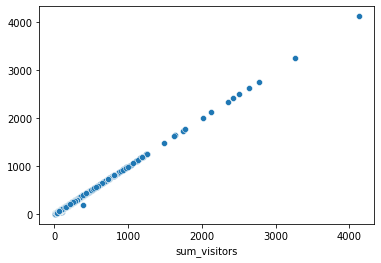

In [11]:
sns.scatterplot(y, pred1)

### Decision Tree

In [12]:
mod2 = DecisionTreeRegressor(random_state=1)
mod2.fit(X,y)

DecisionTreeRegressor(random_state=1)

In [13]:
pred2 = mod2.predict(X)
model_dict = {'model': "Decision Tree"}
models_list = models_list.append({**model_dict, **regressionMetrics(y, pred2)}, ignore_index=True)
models_list

,model,MSE,RMSE,MAE,MSLE,RMSLE
0,LinearRegression,6.359374,2.52178,0.268691,0.000784,0.027996
1,Decision Tree,0.000000,0.00000,0.000000,0.000000,0.000000


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='sum_visitors'>

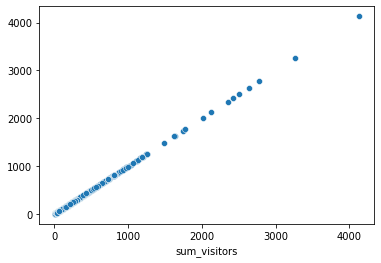

In [14]:
sns.scatterplot(y, pred2)

### Random Forest

In [15]:
mod3 = RandomForestRegressor(random_state=1)
mod3.fit(X,y)

RandomForestRegressor(random_state=1)

In [16]:
pred3 = mod3.predict(X)
model_dict = {'model': "RandomForest"}
models_list = models_list.append({**model_dict, **regressionMetrics(y, pred3)}, ignore_index=True)
models_list

,model,MSE,RMSE,MAE,MSLE,RMSLE
0,LinearRegression,6.359374,2.521780,0.268691,0.000784,0.027996
1,Decision Tree,0.000000,0.000000,0.000000,0.000000,0.000000
2,RandomForest,32.858591,5.732241,0.226421,0.000043,0.006540


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='sum_visitors'>

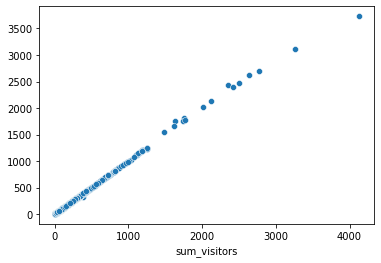

In [17]:
sns.scatterplot(y, pred3)

### Adaptive Boosting (ADABoost)

In [18]:
mod4 = AdaBoostRegressor(random_state=1)
mod4.fit(X,y)

AdaBoostRegressor(random_state=1)

In [19]:
pred4 = mod4.predict(X)
model_dict = {'model': "ADABoost"}
models_list = models_list.append({**model_dict, **regressionMetrics(y, pred4)}, ignore_index=True)
models_list

,model,MSE,RMSE,MAE,MSLE,RMSLE
0,LinearRegression,6.359374,2.521780,0.268691,0.000784,0.027996
1,Decision Tree,0.000000,0.000000,0.000000,0.000000,0.000000
2,RandomForest,32.858591,5.732241,0.226421,0.000043,0.006540
3,ADABoost,1427.235485,37.778770,31.776449,0.322310,0.567723


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='sum_visitors'>

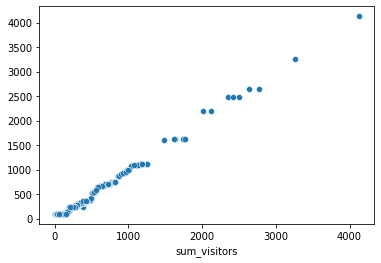

In [20]:
sns.scatterplot(y, pred4)

### Gradient Boosting Machine (GBM)

In [21]:
mod5 = GradientBoostingRegressor(random_state=1)
mod5.fit(X,y)

GradientBoostingRegressor(random_state=1)

In [22]:
pred5 = mod5.predict(X)
model_dict = {'model': "GBM"}
models_list = models_list.append({**model_dict, **regressionMetrics(y, pred5)}, ignore_index=True)
models_list

,model,MSE,RMSE,MAE,MSLE,RMSLE
0,LinearRegression,6.359374,2.521780,0.268691,0.000784,0.027996
1,Decision Tree,0.000000,0.000000,0.000000,0.000000,0.000000
2,RandomForest,32.858591,5.732241,0.226421,0.000043,0.006540
3,ADABoost,1427.235485,37.778770,31.776449,0.322310,0.567723
4,GBM,2.727011,1.651366,1.104786,0.000751,0.027412


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='sum_visitors'>

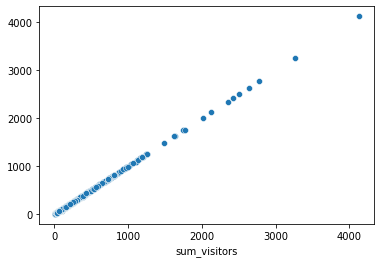

In [23]:
sns.scatterplot(y, pred5)

### Support Vector Machine (SVM)

In [24]:
mod6 = SVR()
mod6.fit(X,y)

SVR()

In [25]:
pred6 = mod6.predict(X)
model_dict = {'model': "SVR"}
models_list = models_list.append({**model_dict, **regressionMetrics(y, pred6)}, ignore_index=True)
models_list

,model,MSE,RMSE,MAE,MSLE,RMSLE
0,LinearRegression,6.359374,2.521780,0.268691,0.000784,0.027996
1,Decision Tree,0.000000,0.000000,0.000000,0.000000,0.000000
2,RandomForest,32.858591,5.732241,0.226421,0.000043,0.006540
3,ADABoost,1427.235485,37.778770,31.776449,0.322310,0.567723
4,GBM,2.727011,1.651366,1.104786,0.000751,0.027412
5,SVR,14700.298246,121.244786,13.548395,0.044028,0.209829


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='sum_visitors'>

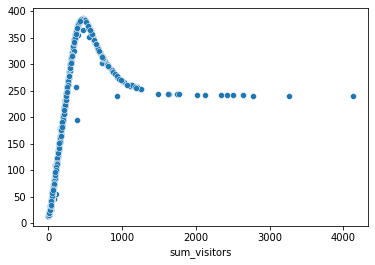

In [26]:
sns.scatterplot(y, pred6)

# Ridge

In [27]:
mod7 = RidgeClassifier()
mod7.fit(X,y)

RidgeClassifier()

In [28]:
pred7 = mod7.predict(X)
model_dict = {'model': "Ridge"}
models_list = models_list.append({**model_dict, **regressionMetrics(y, pred7)}, ignore_index=True)
models_list

,model,MSE,RMSE,MAE,MSLE,RMSLE
0,LinearRegression,6.359374,2.521780,0.268691,0.000784,0.027996
1,Decision Tree,0.000000,0.000000,0.000000,0.000000,0.000000
2,RandomForest,32.858591,5.732241,0.226421,0.000043,0.006540
3,ADABoost,1427.235485,37.778770,31.776449,0.322310,0.567723
4,GBM,2.727011,1.651366,1.104786,0.000751,0.027412
5,SVR,14700.298246,121.244786,13.548395,0.044028,0.209829
6,Ridge,115096.759645,339.259133,116.908056,0.549416,0.741226


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='sum_visitors'>

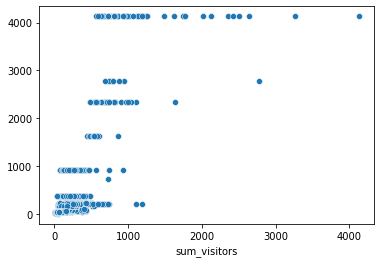

In [29]:
sns.scatterplot(y, pred7)

# Stochastic Gradient Descent Regression = SGD

In [30]:
mod8 = SGDClassifier()
mod8.fit(X,y)

SGDClassifier()

In [31]:
pred8 = mod8.predict(X)
model_dict = {'model': "SGD"}
models_list = models_list.append({**model_dict, **regressionMetrics(y, pred8)}, ignore_index=True)
models_list

,model,MSE,RMSE,MAE,MSLE,RMSLE
0,LinearRegression,6.359374,2.521780,0.268691,0.000784,0.027996
1,Decision Tree,0.000000,0.000000,0.000000,0.000000,0.000000
2,RandomForest,32.858591,5.732241,0.226421,0.000043,0.006540
3,ADABoost,1427.235485,37.778770,31.776449,0.322310,0.567723
4,GBM,2.727011,1.651366,1.104786,0.000751,0.027412
5,SVR,14700.298246,121.244786,13.548395,0.044028,0.209829
6,Ridge,115096.759645,339.259133,116.908056,0.549416,0.741226
7,SGD,26109.055728,161.582969,77.645528,0.573370,0.757212


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='sum_visitors'>

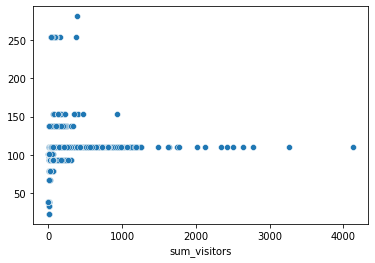

In [32]:
sns.scatterplot(y, pred8)

# Elastic Net 

In [33]:
mod9 = ElasticNet(alpha=1.0, l1_ratio=0.5)
mod9.fit(X,y)

ElasticNet()

In [34]:
pred9 = mod9.predict(X)
model_dict = {'model': "Elastic-Net"}
models_list = models_list.append({**model_dict, **regressionMetrics(y, pred9)}, ignore_index=True)
models_list

,model,MSE,RMSE,MAE,MSLE,RMSLE
0,LinearRegression,6.359374,2.521780,0.268691,0.000784,0.027996
1,Decision Tree,0.000000,0.000000,0.000000,0.000000,0.000000
2,RandomForest,32.858591,5.732241,0.226421,0.000043,0.006540
3,ADABoost,1427.235485,37.778770,31.776449,0.322310,0.567723
4,GBM,2.727011,1.651366,1.104786,0.000751,0.027412
5,SVR,14700.298246,121.244786,13.548395,0.044028,0.209829
6,Ridge,115096.759645,339.259133,116.908056,0.549416,0.741226
7,SGD,26109.055728,161.582969,77.645528,0.573370,0.757212
8,Elastic-Net,6.375449,2.524965,0.234642,0.000625,0.025000


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='sum_visitors'>

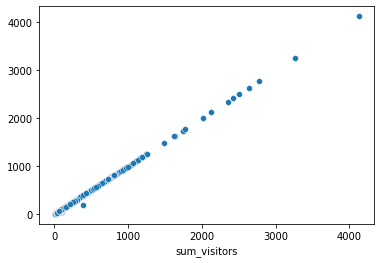

In [35]:
sns.scatterplot(y, pred9)

In [36]:
### BayesianRidge

In [37]:
mod10 = linear_model.BayesianRidge()
mod10.fit(X,y)

BayesianRidge()

In [38]:
pred10 = mod10.predict(X)
model_dict = {'model': "BayesianRidge"}
models_list = models_list.append({**model_dict, **regressionMetrics(y, pred10)}, ignore_index=True)
models_list

,model,MSE,RMSE,MAE,MSLE,RMSLE
0,LinearRegression,6.359374,2.521780,0.268691,0.000784,0.027996
1,Decision Tree,0.000000,0.000000,0.000000,0.000000,0.000000
2,RandomForest,32.858591,5.732241,0.226421,0.000043,0.006540
3,ADABoost,1427.235485,37.778770,31.776449,0.322310,0.567723
4,GBM,2.727011,1.651366,1.104786,0.000751,0.027412
5,SVR,14700.298246,121.244786,13.548395,0.044028,0.209829
6,Ridge,115096.759645,339.259133,116.908056,0.549416,0.741226
7,SGD,26109.055728,161.582969,77.645528,0.573370,0.757212
8,Elastic-Net,6.375449,2.524965,0.234642,0.000625,0.025000
9,BayesianRidge,6.359376,2.521780,0.268573,0.000781,0.027940


## Model Selection

In [39]:
#Mean Absolute Error - we will follow this metric
models_list.sort_values('MAE')

,model,MSE,RMSE,MAE,MSLE,RMSLE
1,Decision Tree,0.000000,0.000000,0.000000,0.000000,0.000000
2,RandomForest,32.858591,5.732241,0.226421,0.000043,0.006540
8,Elastic-Net,6.375449,2.524965,0.234642,0.000625,0.025000
9,BayesianRidge,6.359376,2.521780,0.268573,0.000781,0.027940
0,LinearRegression,6.359374,2.521780,0.268691,0.000784,0.027996
4,GBM,2.727011,1.651366,1.104786,0.000751,0.027412
5,SVR,14700.298246,121.244786,13.548395,0.044028,0.209829
3,ADABoost,1427.235485,37.778770,31.776449,0.322310,0.567723
7,SGD,26109.055728,161.582969,77.645528,0.573370,0.757212
6,Ridge,115096.759645,339.259133,116.908056,0.549416,0.741226


In [40]:
#Root Mean Squared Error 
models_list.sort_values('RMSE')

,model,MSE,RMSE,MAE,MSLE,RMSLE
1,Decision Tree,0.000000,0.000000,0.000000,0.000000,0.000000
4,GBM,2.727011,1.651366,1.104786,0.000751,0.027412
0,LinearRegression,6.359374,2.521780,0.268691,0.000784,0.027996
9,BayesianRidge,6.359376,2.521780,0.268573,0.000781,0.027940
8,Elastic-Net,6.375449,2.524965,0.234642,0.000625,0.025000
2,RandomForest,32.858591,5.732241,0.226421,0.000043,0.006540
3,ADABoost,1427.235485,37.778770,31.776449,0.322310,0.567723
5,SVR,14700.298246,121.244786,13.548395,0.044028,0.209829
7,SGD,26109.055728,161.582969,77.645528,0.573370,0.757212
6,Ridge,115096.759645,339.259133,116.908056,0.549416,0.741226


In [41]:
df_test = pd.read_csv('../input/test-dev-train/test_data.csv')
df_test.describe()
                  # dependant variable

,visit_week,max_visitors,min_visitors,avg_visitors,count_visitors,weekend_visitors,sum_visitors
count,8457.000000,8457.000000,8457.000000,8457.000000,8457.000000,8457.000000,8457.000000
mean,25.398250,34.803595,9.632139,20.546766,6.492137,287.964172,144.036538
std,16.340318,24.084217,9.060259,12.728748,3.867326,369.325448,184.653175
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,10.000000,19.000000,3.000000,11.000000,6.000000,128.000000,64.000000
50%,27.000000,31.000000,7.000000,18.000000,6.000000,220.000000,110.000000
75%,40.000000,46.000000,13.000000,28.000000,7.000000,364.000000,182.000000
max,53.000000,777.000000,116.000000,131.000000,99.000000,10482.000000,5241.000000


In [42]:
X_test = df.drop(['sum_visitors'],axis=1).values # independant features
y_test = df['sum_visitors']   

### Gradient Boosting Machine (GBM)

In [43]:
mod_winner = GradientBoostingRegressor(random_state=1)
mod_winner.fit(X_test,y_test)

GradientBoostingRegressor(random_state=1)

In [44]:
pred_winner = mod_winner.predict(X_test)
model_dict = {'model': "GBM_test"}
models_list = models_list.append({**model_dict, **regressionMetrics(y_test, pred_winner)}, ignore_index=True)
models_list

,model,MSE,RMSE,MAE,MSLE,RMSLE
0,LinearRegression,6.359374,2.521780,0.268691,0.000784,0.027996
1,Decision Tree,0.000000,0.000000,0.000000,0.000000,0.000000
2,RandomForest,32.858591,5.732241,0.226421,0.000043,0.006540
3,ADABoost,1427.235485,37.778770,31.776449,0.322310,0.567723
4,GBM,2.727011,1.651366,1.104786,0.000751,0.027412
5,SVR,14700.298246,121.244786,13.548395,0.044028,0.209829
6,Ridge,115096.759645,339.259133,116.908056,0.549416,0.741226
7,SGD,26109.055728,161.582969,77.645528,0.573370,0.757212
8,Elastic-Net,6.375449,2.524965,0.234642,0.000625,0.025000
9,BayesianRidge,6.359376,2.521780,0.268573,0.000781,0.027940


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='sum_visitors'>

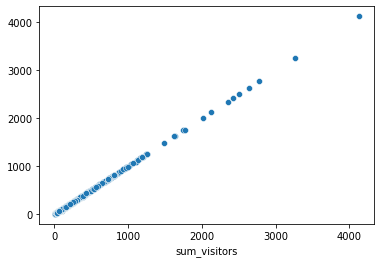

In [45]:
sns.scatterplot(y_test, pred_winner)

In [46]:
# model selection #Root Mean Squared Error 
models_list.sort_values('RMSE')

,model,MSE,RMSE,MAE,MSLE,RMSLE
1,Decision Tree,0.000000,0.000000,0.000000,0.000000,0.000000
4,GBM,2.727011,1.651366,1.104786,0.000751,0.027412
10,GBM_test,2.727011,1.651366,1.104786,0.000751,0.027412
0,LinearRegression,6.359374,2.521780,0.268691,0.000784,0.027996
9,BayesianRidge,6.359376,2.521780,0.268573,0.000781,0.027940
8,Elastic-Net,6.375449,2.524965,0.234642,0.000625,0.025000
2,RandomForest,32.858591,5.732241,0.226421,0.000043,0.006540
3,ADABoost,1427.235485,37.778770,31.776449,0.322310,0.567723
5,SVR,14700.298246,121.244786,13.548395,0.044028,0.209829
7,SGD,26109.055728,161.582969,77.645528,0.573370,0.757212
